![Curso Schwarz-Sosa-Suriano](https://cms.fi.uba.ar/uploads/logo_FIUBA_color_2_eb5b4d0124.png)
# Diferenciación Numérica - Primera parte
**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*

**¿Por qué necesitamos una solución numérica?**
* No conocemos la función, solamente contamos con datos obtenidos de mediciones.
* La función no es derivable.

### Diferencias progresivas
A partir de la definición matemática de la derivada de una función, un método propuesto para su aproximación es el siguiente:

$$ D(x_0)= \frac{f(x_0+h)-f(x_0)}{h}$$

Para ser coherentes el paso h debería tomar valores pequeños.
<br>Siendo el error:
$$ e= \frac{f''(\xi).h}{2}$$
Decimos que tiene un orden de convergencia lineal **O(h)** y es proporcional a la derivada segunda de la función. 

**Definición de derivada**
$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

**EJEMPLO:**
Para determinar que tan buena es la aproximación propuesta, se va a realizar un ejemplo con la siguiente función:<br>
$$ f(x) = x^2 + 3x - e^x$$
$$f'(x0)$$
$$x_0=4$$

In [1]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos
import sympy as sp #librería para manejo simbólico de ecuaciones
import matplotlib.pyplot as plt

In [2]:
#Primero trabajamos con la función simbólicamente para que calcule la derivada
x = sp.symbols('x')
y = x*x+3*x-sp.exp(x) #Acá hay que escribor la función a analizar

#Evalúar numéricamente la función
f=sp.lambdify(x,y)

In [3]:
#Derivada analítica
x0=4
yd = sp.diff(y,x) #Calcula la derivada simbólica
fd=sp.lambdify(x,yd)
derivada=fd(x0)
print('Derivada analítica en x =',x0, 'es',derivada)

Derivada analítica en x = 4 es -43.598150033144236


Para poder calcular la aproximación con el método de las diferencias progresivas, además de definir el punto en el cual se quiere calcular la derivada, se debe definir el paso (h).

In [4]:
#Método de diferencias progresivas
def DifProgresivas(x0,h):
    df=(f(x0+h)-f(x0))/h
    return df

In [5]:
x0=4 #Punto en el que queremos evaluar la derivada de la función.
h=0.5 #Paso (distancia al punto x0)
ResDP=DifProgresivas(x0,h)

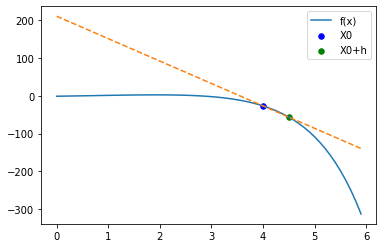

In [6]:
ejex = np.arange(0, 6, 0.1);
y = f(ejex)
rectatang=((f(x0+h)-f(x0))/h)*(ejex-(x0+h))+f(x0+h) #Definimos la recta que pasa por los puntos x0 y x0+h
plt.plot(ejex, y, label = 'f(x)')
plt.plot(ejex,rectatang, linestyle="--")
plt.scatter(x0,f(x0), marker="o", c='blue', s=30, label='X0')
plt.scatter(x0+h,f(x0+h),marker="o", c='green', s=30, label='X0+h')
plt.legend();

**Comparación de resultados**

In [7]:
#Definimos el error relativo
def ErrorRel(real,aprox):
    e=100*abs((aprox-real)/aprox)
    return e

In [8]:
print('Derivada analítica: ', derivada)
print('El resultado por diferencias progresivas tomando un paso de ',h, 'es: ',ResDP)
ErrorDP=ErrorRel(derivada,ResDP)
print('El error relativo porcentual es: ',ErrorDP)

Derivada analítica:  -43.598150033144236
El resultado por diferencias progresivas tomando un paso de  0.5 es:  -59.33796253475515
El error relativo porcentual es:  26.525704337070664


### Diferencias regresivas
$$ D(x_0)= \frac{f(x_0)-f(x_0-h)}{h}$$
Para obtener una aproximación por este método se procede de la misma forma que para el método de diferencias progresivas.
<br>También tiene un orden de convergencia lineal **O(h)**.

In [9]:
#Método de diferencias regresivas
def DifRegresivas(x0,h):
    df=(f(x0)-f(x0-h))/h
    return df

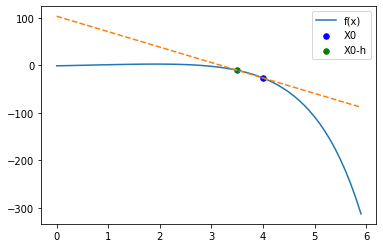

In [10]:
ejex = np.arange(0, 6, 0.1);
y = f(ejex)
rectatang=((f(x0)-f(x0-h))/h)*(ejex-x0)+f(x0) #Definimos la recta que pasa por los puntos x0 y x0-h
plt.plot(ejex, y, label = 'f(x)')
plt.plot(ejex,rectatang, linestyle="--")
plt.scatter(x0,f(x0), marker="o", c='blue', s=30, label='X0')
plt.scatter(x0-h,f(x0-h),marker="o", c='green', s=30, label='X0-h')
plt.legend();

In [11]:
x0=4 #Punto en el que queremos evaluar la derivada de la función.
h=0.5 #Paso (distancia al punto x0)
ResDR=DifRegresivas(x0,h)
print('El resultado por diferencias regresivas tomando un paso de ',h, 'es: ',ResDR)

El resultado por diferencias regresivas tomando un paso de  0.5 es:  -32.46539614890385


**Comparación de resultados**

In [12]:
print('Derivada analítica: ', derivada)
print('El resultado por diferencias regresivas tomando un paso de ',h, 'es: ',ResDR)
ErrorDR=ErrorRel(derivada,ResDR)
print('El error relativo porcentual es: ',ErrorDR)

Derivada analítica:  -43.598150033144236
El resultado por diferencias regresivas tomando un paso de  0.5 es:  -32.46539614890385
El error relativo porcentual es:  34.29113827282305


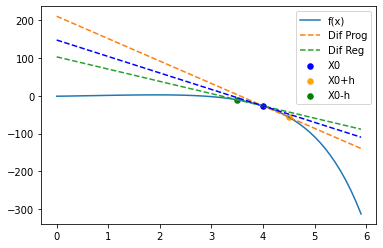

In [13]:
ejex = np.arange(0, 6, 0.1);
y = f(ejex)
rectaP=((f(x0+h)-f(x0))/h)*(ejex-(x0+h))+f(x0+h) #Definimos la recta que pasa por los puntos x0 y x0+h
rectaR=((f(x0)-f(x0-h))/h)*(ejex-x0)+f(x0) #Definimos la recta que pasa por los puntos x0 y x0-h
rectatang=derivada*(ejex-x0)+f(x0)
plt.plot(ejex, y, label = 'f(x)')
plt.plot(ejex,rectaP, linestyle="--", label='Dif Prog')
plt.plot(ejex,rectaR, linestyle="--", label='Dif Reg')
plt.plot(ejex,rectatang,linestyle="--", c='blue')
plt.scatter(x0,f(x0), marker="o", c='blue', s=30, label='X0')
plt.scatter(x0+h,f(x0+h),marker="o", c='orange', s=30, label='X0+h')
plt.scatter(x0-h,f(x0-h),marker="o", c='green', s=30, label='X0-h')
plt.legend();

### ¿Como podemos mejorar el resultado?
**1- Disminuir el paso h**

Como el error de truncamiento es proporcional a **h**, al disminuir el paso deberíamos obtener mejores resultados. 

Para el ejemplo dado, utilizando el método de diferencias progresivas, vamos a ir achicando el valor del paso (h)

In [14]:
x0=4 #Punto en el que queremos evaluar la derivada de la función.
h0=0.5
n=5
h = np.zeros(n)
RDP=np.zeros(n)
EDP=np.zeros(n)

In [15]:
for i in range(0,n):
    h[i]=h0/(i+1)
    RDP[i]=DifProgresivas(x0,h[i])
    EDP[i]=ErrorRel(derivada,RDP[i])

In [16]:
df=pd.DataFrame({"(1) h": h, "(2) Dif Progesivas": RDP, "(3) Error": EDP})
df.head()

,(1) h,(2) Dif Progesivas,(3) Error
0,0.500000,-59.337963,26.525704
1,0.250000,-50.779049,14.141461
2,0.166667,-48.244992,9.631759
3,0.125000,-47.032274,7.301632
4,0.100000,-46.321376,5.878983


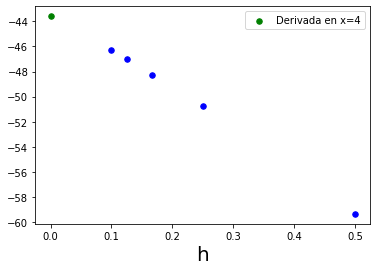

In [17]:
plt.scatter(h,RDP, marker="o", c='blue', s=30)
plt.scatter(0,derivada,marker='o',c='green',s=30, label='Derivada en x=4')
plt.xlabel('h',fontsize=20)
plt.legend();

Podemos ver que al disminuir el paso se obtiene una mejor aproximación. También podemos notar que para obtener un resultado similar al exacto va a ser necesario disminuir el h considerablemente. 
Como se vió, hacer esto no es recomendable ya que tomar valores de h muy pequeños puede resultar en un aumento del error de redondeo. 

### ¿Como podemos mejorar el resultado?
**2 - Aumentar el orden de convergencia**

Como el error es proporcional a h **<sup>n</sup>**, siendo **n** el orden de convergencia, al aumentar el orden de convergencia vamos a obtener una mejor aproximación. 

### Diferencias centradas
$$ D(x_0)= \frac{f(x_0+h)-f(x_0-h)}{2h}$$

En este método se utilizan 3 puntos para aproximar la derivada: $f(x_0-h)$, $f(x_0)$ y $f(x_0+h)$.

<br>Error de truncamiento
$$ e= \frac{f'''(\xi).h^2}{6}$$
<br>El orden de convergencia es **O(h<sup>2</sup>)**

In [18]:
#Método de diferencias centradas
def DifCentradas(x0,h):
    df=(f(x0+h)-f(x0-h))/(2*h) 
    return df

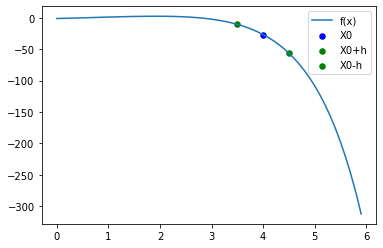

In [19]:
x0=4 #Punto en el que queremos evaluar la derivada de la función.
h=0.5 #Paso 
ejex = np.arange(0, 6, 0.1);
y = f(ejex)
plt.plot(ejex, y, label = 'f(x)')
plt.scatter(x0,f(x0), marker="o", c='blue', s=30, label='X0')
plt.scatter(x0+h,f(x0+h),marker="o", c='green', s=30, label='X0+h')
plt.scatter(x0-h,f(x0-h),marker="o", c='green', s=30, label='X0-h')
plt.legend();

In [20]:
ResDC=DifCentradas(x0,h)
print('El resultado por diferencias centradas tomando un paso de ',h, 'es: ',ResDC)
ErrorDC=ErrorRel(derivada,ResDC)
print('El error relativo porcentual es: ',ErrorDC)

El resultado por diferencias centradas tomando un paso de  0.5 es:  -45.9016793418295
El error relativo porcentual es:  5.018398763868519


**Comparación de los 3 métodos**

In [21]:
df = pd.DataFrame({"h": h, "Dif Progesivas": ResDP, "Dif Regresivas": ResDR, "Dif Centradas": ResDC, "Derivada": derivada},index=[0])
df.head()

,h,Dif Progesivas,Dif Regresivas,Dif Centradas,Derivada
0,0.5,-59.337963,-32.465396,-45.901679,-43.59815


### Método de los 5 puntos
$$ D(x_0)= \frac{f(x_0-2h)-8f(x_0-h)+8f(x_0+h)+f(x_0+2h)}{12h}$$
El error del método es:

$$ e= \frac{f^{v}(\xi).h^4}{30}$$


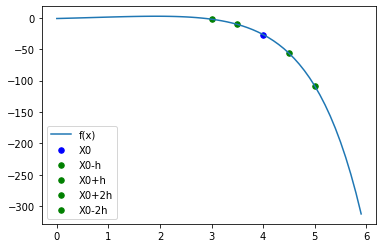

In [22]:
ejex = np.arange(0, 6, 0.1);
y = f(ejex)
plt.plot(ejex, y, label = 'f(x)')
plt.scatter(x0,f(x0), marker="o", c='blue', s=30, label='X0')
plt.scatter(x0-h,f(x0-h),marker="o", c='green', s=30, label='X0-h')
plt.scatter(x0+h,f(x0+h),marker="o", c='green', s=30, label='X0+h')
plt.scatter(x0+2*h,f(x0+2*h),marker="o", c='green', s=30, label='X0+2h')
plt.scatter(x0-2*h,f(x0-2*h),marker="o", c='green', s=30, label='X0-2h')
plt.legend();

In [23]:
#Método de los 5 puntos
def Metodo5Puntos(x0,h):
    df=(f(x0-2*h)-8*f(x0-h)+8*f(x0+h)-f(x0+2*h))/(12*h) 
    print('El valor de la derivada es',df)
    return df

In [24]:
x0=4 
h=0.5
Res5P=Metodo5Puntos(x0,h)
print('El resultado por el método de los 5 puntos tomando un paso de ',h, 'es: ',Res5P)
Error5P=ErrorRel(derivada,Res5P)
print('El error relativo porcentual es: ',Error5P)

El valor de la derivada es -43.48096875920785
El resultado por el método de los 5 puntos tomando un paso de  0.5 es:  -43.48096875920785
El error relativo porcentual es:  0.26950014519070137


In [25]:
Res5P=Metodo5Puntos(x0,h/2)
print('El resultado por el método de los 5 puntos tomando un paso de ',h/2, 'es: ',Res5P)
Error5P=ErrorRel(derivada,Res5P)
print('El error relativo porcentual es: ',Error5P)

El valor de la derivada es -43.59098781039037
El resultado por el método de los 5 puntos tomando un paso de  0.25 es:  -43.59098781039037
El error relativo porcentual es:  0.01643051262114894


A partir de los resultados obtenidos, podemos ver la fórmula de los 5 puntos tomando un mismo paso en todos los casos, es la que da el mejor resultado. Si además disminuimos el paso a la mitad, obtenemos un resultado prácticamente igual al buscado (con un error del 0.016%).
<br>El principal problema suele estar asociado a la disponibilidad de la información. Es problable que no siempre contemos con tantos valores de la función.  

**Ejemplo adicional:**
¿Que sucede si no conocemos la función y solamente tenemos algunos puntos obtenidos a partir de mediciones?
<br>Vamos a suponer que solo tenemos como dato los puntos que se muestran en la tabla y que queremos conocer el valor de la derivada en x0=4.

In [26]:
x = np.arange(3.5, 4.5, 0.25)
y = f(x)

In [27]:
puntos=pd.DataFrame({"x": x, "y": y})
puntos.head()

,x,y
0,3.50,-10.365452
1,3.75,-17.208582
2,4.00,-26.598150
3,4.25,-39.292912


**Diferencias regresivas**<br>
Teniendo los valores de la función en 3.5 y 3.75, podemos obtener el resultado para diferencias regresivas tomando un h=0.5 y un h=0.25 

In [28]:
x0=x[2] #Punto en el que queremos evaluar la derivada de la función.
h1=x0-x[0]
h2=x0-x[1]

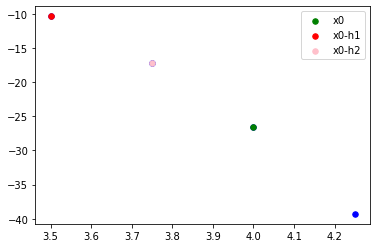

In [29]:
plt.scatter(x,y, marker="o", c='blue', s=30)
plt.scatter(x0,f(x0), marker="o", c='green',s=30, label='x0')
plt.scatter(x0-h1,f(x0-h1), marker="o", c='red',s=30, label='x0-h1')
plt.scatter(x0-h2,f(x0-h2), marker="o", c='pink',s=30, label='x0-h2')
plt.legend()

In [30]:
DifReg1=DifRegresivas(x0,h1)
print('El resultado por diferencias regresivas con un paso de ',h1, 'es: ',DifReg1)
DifReg2=DifRegresivas(x0,h2)
print('El resultado por diferencias regresivas con un paso de ',h2, 'es: ',DifReg2)

El resultado por diferencias regresivas con un paso de  0.5 es:  -32.46539614890385
El resultado por diferencias regresivas con un paso de  0.25 es:  -37.55827213232581


**Diferencias progresivas**<br>
Para calcular la derivada en x0=4 contamos solo con un punto "siguiente", por lo que únicamente se podría tomar un paso de 0.25

In [31]:
h1=x[3]-x0
DifProg=DifProgresivas(x0,h1)
print('El resultado por diferencias progresivas con un paso de ',h1, 'es: ',DifProg)

El resultado por diferencias progresivas con un paso de  0.25 es:  -50.77904925417448


**Diferencias centradas**<br>
Al no tener información de la función en x=4.5, no se podría tomar un paso de h=0.5. La única alternativa es utilizar h=0.25

In [32]:
DifCentr=DifCentradas(x0,h1)
print('El resultado por diferencias centradas con un paso de ',h1, 'es: ',DifCentr)

El resultado por diferencias centradas con un paso de  0.25 es:  -44.168660693250146


**Conclusiones:**<br>
* El máximo orden de convergencia al que se pudo llegar (utilizando los métodos vistos en clase) fue O(h<sup>2</sup>). Para el problema planteado no tenemos valores suficientes de la función para poder aplicar el método de los 5 puntos. 
* El paso mínimo utilizado en cada método también esta condicionado por los puntos dados como dato. En todos los casos el paso mínimo que se pudo tomar fue de 0.25.